# Plotting and Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
from numpy.random import randn

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

## A Brief matplotlib API Primer

In [ ]:
data = np.arange(10)
data

In [ ]:
plt.plot(data)

### Figures and Subplots

In [ ]:
fig = plt.figure()

In [ ]:
ax1 = fig.add_subplot(2, 2, 1)

In [ ]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [ ]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [ ]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [ ]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [ ]:
plt.close('all')

In [ ]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

In [ ]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### subplot options
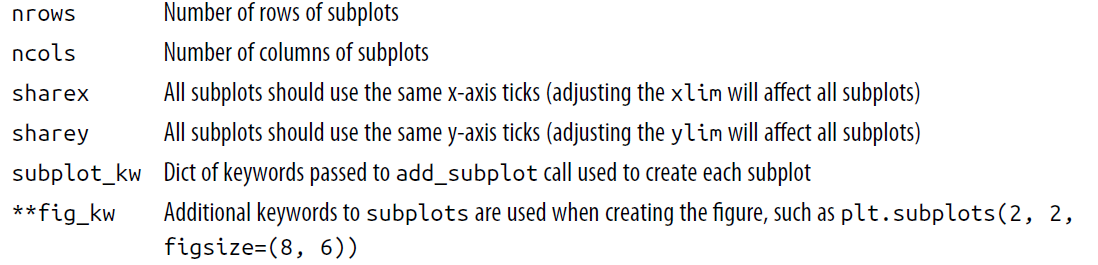

### Colors, Markers, and Line Styles

In [ ]:
x = np.random.randn(100)
y = x.cumsum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1, 1)
ax1.plot(x, y, 'g--')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1, 1)
ax.plot(x, y, linestyle='--', color='g')

In [ ]:
plt.plot(randn(30).cumsum(), 'ko--')

In [ ]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [ ]:
plt.close('all')

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

In [ ]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set(**props)

#### Adding legends, Annotations

In [ ]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')
ax.text(50,50, 'Hello world!',family='monospace', fontsize=10)

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

### Saving Plots to File

In [ ]:
plt.savefig('figpath.svg')

In [ ]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [ ]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib Configuration

In [ ]:
plt.rc('figure', figsize=(10, 10))

In [ ]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 12}
plt.rc('font', **font_options)

## Plotting with pandas and seaborn

### Line Plots

In [ ]:
plt.close('all')

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
np.random.seed(12348)

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

In [ ]:
plt.figure()

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
plt.close('all')

In [ ]:
tips = pd.read_csv('data/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [ ]:
plt.close('all')

In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [ ]:
plt.close('all')

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [ ]:
plt.close('all')

In [ ]:
sns.set(style="whitegrid")

### Histograms and Density Plots

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot.density()

In [ ]:
plt.figure()

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [ ]:
macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

In [ ]:
plt.figure()

In [ ]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

In [ ]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS